<a href="https://colab.research.google.com/github/ShrRa/UNG_OpenDay_ConvDemo/blob/main/ConvolutionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab_widgets 3.0.14
    Uninstalling jupyterlab_widgets-3.0.14:
      Successfully uninstalled jupyterlab_widgets-3.0.14
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [13]:
import panel as pn
import holoviews as hv
from holoviews import opts
import cv2
from google.colab.patches import cv2_imshow
import time
from PIL import Image
import numpy as np

In [14]:
pn.extension()

In [15]:
from bokeh.resources  import settings

settings.resources = 'inline'

### Files and directories

In [16]:
image_paths = {
    'Image 1': 'image_1.jpg',
    'Image 2': 'image_2.jpg',
    'Image 3': 'image_3.jpg'
}

### Functions

In [53]:
# Function to select source image
def select_source_image(event):
    image_path = image_paths[selector_image.value]
    try:
        #image = hv.RGB.load_image(image_path).opts(opts.RGB(width=400, height=300))
        #image = Image.new('RGB', (400, 300), color='white')
        image = Image.open(image_path)
        #image = image.resize((400, 300))
        pane_source_image.object = image
    except Exception as e:
        print(f"Error loading image: {e}")
        pane_source_image.object = hv.Text(0, 0, f"Error loading {image_path}")

In [125]:
# Function to convolve the source image
def convolve_image(image_path, kernel_type):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Error: Could not load image at", image_path)
            return None

        if kernel_type == 'vertical':
            kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        elif kernel_type == 'horizontal':
            kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        elif kernel_type == 'laplacian':
            kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        else:
            print("Error: Invalid kernel type.")
            return None

        convolved_img = Image.fromarray(cv2.filter2D(img, -1, kernel))
        return convolved_img
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [126]:
# Function to reveal convolution image patch by patch
def reveal_convolution(event):
    try:
        image_path = image_paths[selector_image.value]
        kernel_type = selector_kernel.value
        convolved_img = convolve_image(image_path, kernel_type)

        width, height = convolved_img.size
        #part_width = int(0.1 * width)
        #part_height = int(0.1 * height)
        part_width = 3
        part_height = 3
        revealed_image = Image.new('RGB', (width, height), color='gray')

        for i in range(0, height, part_height):
            for j in range(0, width, part_width):
                part = convolved_img.crop((j, i, min(j + part_width, width), min(i + part_height, height)))
                revealed_image.paste(part, (j, i))
                pane_convolved_image.object = revealed_image
                time.sleep(0.005)
    except Exception as e:
        print(f"Error revealing image: {e}")
        pane_convolved_image.object = "Error revealing image."

### Layout

In [135]:
selector_image = pn.widgets.Select(name='Select Image', options=list(image_paths.keys()))
selector_kernel = pn.widgets.Select(name='Kernel', options=['vertical', 'horizontal', 'laplacian'])
button_run_convolution = pn.widgets.Button(name="Start convolution")
#pane_source_image = pn.pane.HoloViews(hv.Text(0, 0, "Select an image"))
pane_source_image = pn.pane.Image(object=Image.new('RGB', (400, 300), color='gray'))
pane_convolved_image = pn.pane.Image(object=Image.new('RGB', (400, 300), color='gray'))

In [148]:
button = pn.widgets.Button(name="Show image",button_type='primary')

In [149]:
selector_image.param.watch(select_source_image, 'value')
button_run_convolution.on_click(reveal_convolution)
button.on_click(select_source_image)

Watcher(inst=Button(button_type='primary', name='Show image'), cls=<class 'panel.widgets.button.Button'>, fn=<function select_source_image at 0x7c51648d8cc0>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

Row(styles={'background': '...})
    [0] Column
        [0] Select(options=['Image 1', 'Image 2', ...], value='Image 1')
        [1] Select(name='Kernel', options=['vertical', 'horizontal',...], value='vertical')
        [2] Button(name='Start convolution')
    [1] Image(Image)
    [2] Image(Image)
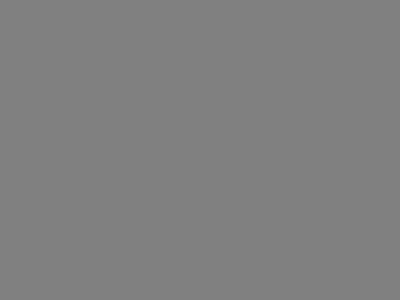
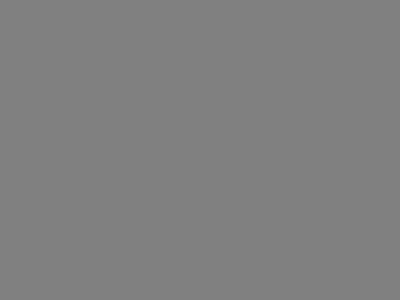

In [150]:
dashboard = pn.Row(pn.Column(
    selector_image,
    selector_kernel,
    button_run_convolution),
    pane_source_image,
    pane_convolved_image,
                   styles=dict(background='WhiteSmoke')
)
# Display the dashboard
dashboard.servable()